# NLA Summative

### Anonymous marking code: Z0159678

In [1]:
import numpy as np
from pandas import DataFrame
import pandas as pd
from nltk.corpus import stopwords
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from os import listdir
from collections import Counter

# Data Preparation

In [2]:
train_body = pd.read_csv("train_bodies.csv")
train_body

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...
...,...,...
1678,2528,Intelligence agencies hunting for identity of ...
1679,2529,"While Daleks ""know no fear"" and ""must not fear..."
1680,2530,More than 200 schoolgirls were kidnapped in Ap...
1681,2531,A Guantanamo Bay prisoner released last year a...


In [3]:
train_stances = pd.read_csv("train_stances.csv")
train_stances

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree
...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,unrelated
49968,Brian Williams slams social media for speculat...,2419,unrelated
49969,Mexico Says Missing Students Not Found In Firs...,1156,agree
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,1012,discuss


In [4]:
train_stances_new = train_stances[['Stance']]
train_stances_new

,Stance
0,unrelated
1,agree
2,unrelated
3,unrelated
4,disagree
...,...
49967,unrelated
49968,unrelated
49969,agree
49970,discuss


In [5]:
train = train_stances.join(train_body.set_index('Body ID').sum(axis=1).to_frame('articleBody'), on='Body ID')
train

,Headline,Body ID,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's..."
...,...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,unrelated,(CNN) -- Boko Haram laughed off Nigeria's anno...
49968,Brian Williams slams social media for speculat...,2419,unrelated,Along with unveiling the Apple Watch earlier t...
49969,Mexico Says Missing Students Not Found In Firs...,1156,agree,The bodies found in a mass grave were confirme...
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,1012,discuss,Rep. Duncan Hunter (R-CA) told Greta Van Suste...


In [92]:
train_sample = train.sample(n=20000, replace=False, weights=None, random_state=1, axis=0)
train_sample

,Headline,Body ID,Stance,articleBody
16138,Report: Amazon to Launch Ad-Supported Streamin...,1071,unrelated,A gunman fired multiple shots at the National ...
41541,That Boko Haram Ceasefire in Nigeria Isn’t A C...,35,unrelated,"New Delhi: AK Verma, an executive engineer at ..."
24165,High School Student Rumored to Have Made $72 M...,1024,unrelated,A 10-year-old member of the ISIS terror group ...
21730,Al-Shabaab co-founder confirmed killed by US a...,646,unrelated,The mystery surrounding the disappearance of 4...
48994,"Confusion swirls, details murky in arrest of I...",2337,discuss,Earlier reports claiming that Lebanese officia...
...,...,...,...,...
11119,Nicaragua Meteorite Impact Theory May Be Meteo...,1917,unrelated,Apple originally planned for the Apple Watch t...
20630,Emotional sergeant-at-arms is greeted back to ...,874,unrelated,Following the deadly shootings at Charlie Hebd...
33008,Blundering boyfriend burns down college after ...,793,unrelated,Mates Casey Dean and Eduard Nitz wish a happy ...
34199,Nigeria announces truce with Boko Haram; fate ...,2096,unrelated,Islamic State militants have released a graphi...


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


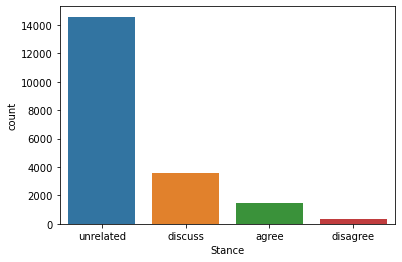

In [429]:
sns1 = sns.countplot(train_sample['Stance'])
sns1.figure.savefig('data', dpi=300)


In [94]:
train_sample2 = train_sample["Stance"] == "unrelated"
train_sample3 = train_sample[train_sample2]

In [98]:
train_sample4 = train_sample3.sample(n=5418, replace=False, weights=None, random_state=1, axis=0)
train_sample4

,Headline,Body ID,Stance,articleBody
39949,Boyfriend cuts off his penis and throws it in ...,2501,unrelated,In response to Ebola Scare in Kansas City :\nV...
6934,NASA Raises Doubts About Reports of Nicaraguan...,1917,unrelated,Apple originally planned for the Apple Watch t...
43944,Hospital: Man not being treated for Ebola in K...,781,unrelated,Turkey's president has said it was wrong for t...
1984,Comcast Is Threatening To Cut Off Customers Wh...,503,unrelated,WARNING: GRAPHIC CONTENT\n\nA man blamed his s...
34517,Would you take a bite out of the world's oldes...,1500,unrelated,Tonight — finally! — ESPN is going to have an ...
...,...,...,...,...
32682,"Everybody Relax, Banksy Wasn’t Arrested And Ex...",2412,unrelated,Reporting in the Telegraph states that US dron...
26825,"Paradise is open to all, even dogs, Pope tells...",2473,unrelated,"Kim Yo-jong, the younger sister of North Korea..."
29346,North Korea directive reveals apparent ban on ...,1506,unrelated,"BAGHDAD, Iraq – The Islamic State (ISIS) incin..."
20044,"Apple Watch to Be Shower-Proof, Have 100,000 A...",1975,unrelated,Video clips circulated online Tuesday that pur...


In [99]:
train_sample5 = train_sample["Stance"] != "unrelated"
train_sample6 = train_sample[train_sample5]
train_sample6

,Headline,Body ID,Stance,articleBody
48994,"Confusion swirls, details murky in arrest of I...",2337,discuss,Earlier reports claiming that Lebanese officia...
48435,HBO and Apple in Talks for $15/Month Apple TV ...,203,discuss,HBO plans to launch its stand-alone Net video ...
44622,Judd Nelson rebuffs Internet rumors that he di...,2286,agree,In a welcome break from a slow weekend of news...
39143,Senior Western Intelligence Official Confirms ...,1036,discuss,British Intelligence officials have zeroed in ...
28405,Dera Sacha Sauda Chief Forced Castration of 40...,1909,discuss,A man dubbed ‘the guru in bling’ allegedly con...
...,...,...,...,...
17587,"Jihadi John named as Mohammed Emwazi, from wes...",2165,agree,"The masked Islamic State militant known as ""Ji..."
37656,Journalist James Wright Foley reportedly behea...,1747,discuss,"A message from Jim's mom, Diane Foley:\nWe hav..."
11006,Watch: US Marine saved by helmet after being s...,743,agree,Shocking video taken from inside an Afghanista...
34698,Seth Rogen Eyed to Play Apple's Steve Wozniak ...,349,discuss,Jessica Chastain is also being sought for a ro...


In [100]:
train_sample7 = pd.concat([train_sample4, train_sample6], axis=0)
train_sample7

,Headline,Body ID,Stance,articleBody
39949,Boyfriend cuts off his penis and throws it in ...,2501,unrelated,In response to Ebola Scare in Kansas City :\nV...
6934,NASA Raises Doubts About Reports of Nicaraguan...,1917,unrelated,Apple originally planned for the Apple Watch t...
43944,Hospital: Man not being treated for Ebola in K...,781,unrelated,Turkey's president has said it was wrong for t...
1984,Comcast Is Threatening To Cut Off Customers Wh...,503,unrelated,WARNING: GRAPHIC CONTENT\n\nA man blamed his s...
34517,Would you take a bite out of the world's oldes...,1500,unrelated,Tonight — finally! — ESPN is going to have an ...
...,...,...,...,...
17587,"Jihadi John named as Mohammed Emwazi, from wes...",2165,agree,"The masked Islamic State militant known as ""Ji..."
37656,Journalist James Wright Foley reportedly behea...,1747,discuss,"A message from Jim's mom, Diane Foley:\nWe hav..."
11006,Watch: US Marine saved by helmet after being s...,743,agree,Shocking video taken from inside an Afghanista...
34698,Seth Rogen Eyed to Play Apple's Steve Wozniak ...,349,discuss,Jessica Chastain is also being sought for a ro...


In [101]:
train_set = train_sample7.sample(frac=1).reset_index(drop=True)
train_set

,Headline,Body ID,Stance,articleBody
0,#Hairgate: iPhone 6 users say device pulls out...,403,unrelated,WORLDWIDE - NASA has confirmed that the Earth ...
1,Bigfoot Strolls Through A Russian Forest -- At...,964,unrelated,Doctor in besieged Syrian town reports arrival...
2,Macaulay Culkin Dead: Actor Once Again Victim ...,498,unrelated,Twitter users are suggesting the phallic daubi...
3,Priest who died for 48 minutes says he met God...,1040,unrelated,(Mashable) Reports that Islamic State militant...
4,"Pizza delivery man gets $2,000 tip",467,unrelated,Crews removed a time capsule dating back to 17...
...,...,...,...,...
10831,Audio recording allegedly captures moment Mich...,472,unrelated,American and British intelligence officials ar...
10832,Hope Fades for Girls' Release After Boko Haram...,840,discuss,Suspected militant Islamists have shot and sla...
10833,Boko Haram 'ceasefire' doubts after attacks re...,1340,agree,Boko Haram thinks all the truce talk is hilari...
10834,Christian Bale quits Steve Jobs movie,2403,unrelated,More than 200 missing schoolgirls kidnapped by...


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


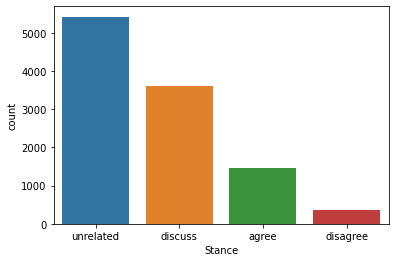

In [430]:
sns2 = sns.countplot(train_set['Stance'])
sns2.figure.savefig('data2', dpi=300)


In [102]:
train_Headline = train_set[['Headline']]
train_articleBody = train_set[['articleBody']]

In [103]:
train_txt = train_set.to_csv('train.txt',sep='\t',index=False, header=None)
train_Headline_txt = train_Headline.to_csv('train_Headline.txt',sep='\t',index=True, header=None)
train_articleBody_txt = train_articleBody.to_csv('train_articleBody.txt',sep='\t',index=True, header=None)

In [478]:
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text 

In [479]:
def clean_doc(doc):
    tokens = doc.split()
    re_punc = re.compile(f'[{re.escape(string.punctuation)}]')
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [480]:
train_txt = 'train.txt'
text1 = load_doc(train_txt)
tokens1 = clean_doc(text1)

In [481]:
tokens1 

['Hairgate',
 'iPhone',
 'users',
 'say',
 'device',
 'pulls',
 'hair',
 'unrelated',
 'WORLDWIDE',
 'NASA',
 'confirmed',
 'Earth',
 'experience',
 'days',
 'almost',
 'complete',
 'darkness',
 'happen',
 'dates',
 'Tuesday',
 'Monday',
 'December',
 'The',
 'world',
 'remain',
 'three',
 'days',
 'without',
 'sunlight',
 'due',
 'solar',
 'storm',
 'cause',
 'dust',
 'space',
 'debris',
 'become',
 'plentiful',
 'thus',
 'block',
 'sunlight',
 'This',
 'head',
 'NASA',
 'Charles',
 'Bolden',
 'made',
 'announcement',
 'asked',
 'everyone',
 'remain',
 'calm',
 'This',
 'product',
 'solar',
 'storm',
 'largest',
 'last',
 'years',
 'period',
 'hours',
 'total',
 'Reporters',
 'interviewed',
 'people',
 'hear',
 'say',
 'situation',
 'Michael',
 'Hearns',
 'responding',
 'gonna',
 'purgin',
 'ngga',
 'six',
 'days',
 'darkness',
 'means',
 'six',
 'days',
 'turnin',
 'Despite',
 'six',
 'days',
 'darkness',
 'soon',
 'come',
 'officials',
 'say',
 'earth',
 'experience',
 'major',
 'pr

In [482]:
str_train = " ".join(tokens1)

In [483]:
file = open('train_clean.txt','w');

file.write(str(tokens1));

file.close();

In [484]:
train_Headline_txt = 'train_Headline.txt'
text = load_doc(train_Headline_txt)
Headline_tokens = clean_doc(text)

In [485]:
Headline_tokens = set(Headline_tokens)

In [486]:
Headline_tokens

{'sergeantatarms',
 'Girls',
 'naked',
 'Report',
 'Turns',
 'employee',
 'Sneezing',
 'Moscow',
 'Poignant',
 'Explains',
 'dams',
 'Search',
 'affirme',
 'Tell',
 'city',
 'Paying',
 'Reporting',
 'clash',
 'Phone',
 'RAM',
 'reach',
 'Tries',
 'documents',
 'others',
 'Anyway',
 'announcement',
 'Heavily',
 'termination',
 'accidentally',
 'Help',
 'Atlantic',
 'suspected',
 'suicide',
 'registers',
 'GIVES',
 'Millan',
 'Rounds',
 'Theory',
 'Clint',
 'revenge',
 'Dime',
 'Completely',
 'Netflix',
 'Wars',
 'Kenya',
 'Harder',
 'members',
 'anchor',
 'attempted',
 'mode',
 'speech',
 'Walsham',
 'Whiz',
 'Shown',
 'abducted',
 'Pants',
 'illustration',
 'TBS',
 'Existing',
 'Purdon',
 'Justice',
 'meant',
 'person',
 'hours',
 'LIVE',
 'officials',
 'ballooning',
 'Identity',
 'Where',
 'Glenn',
 'time',
 'Awry',
 'HazMatWearing',
 'Spotted',
 'CrankBoosting',
 'Taylor',
 'relaxes',
 'Highend',
 'Holding',
 'STOP',
 'office',
 'crude',
 'Afghanistan',
 'contacted',
 'Severely',
 'S

In [487]:
line_1 = []
for i in range(len(train_Headline)):
    for l in train_Headline.iloc[i]:
        l = clean_doc(l)
        line_1.append(' '.join(l))

In [488]:
line_1[0:4] 

['Hairgate iPhone users say device pulls hair',
 'Bigfoot Strolls Through Russian Forest At Least Thats The Claim VIDEO',
 'Macaulay Culkin Dead Actor Once Again Victim Of Death Hoax',
 'Priest died minutes says met God woman']

In [115]:
headline_new = DataFrame(line_1,columns=['headline_new'])
headline_new

,headline_new
0,Hairgate iPhone users say device pulls hair
1,Bigfoot Strolls Through Russian Forest At Leas...
2,Macaulay Culkin Dead Actor Once Again Victim O...
3,Priest died minutes says met God woman
4,Pizza delivery man gets tip
...,...
10831,Audio recording allegedly captures moment Mich...
10832,Hope Fades Girls Release After Boko Haram Truc...
10833,Boko Haram ceasefire doubts attacks reported N...
10834,Christian Bale quits Steve Jobs movie


In [116]:
train_articleBody_txt = 'train_articleBody.txt'
text = load_doc(train_articleBody_txt)
ArticleBody_tokens = clean_doc(text)

In [117]:
ArticleBody_tokens 

['WORLDWIDE',
 'NASA',
 'confirmed',
 'Earth',
 'experience',
 'days',
 'almost',
 'complete',
 'darkness',
 'happen',
 'dates',
 'Tuesday',
 'Monday',
 'December',
 'The',
 'world',
 'remain',
 'three',
 'days',
 'without',
 'sunlight',
 'due',
 'solar',
 'storm',
 'cause',
 'dust',
 'space',
 'debris',
 'become',
 'plentiful',
 'thus',
 'block',
 'sunlight',
 'This',
 'head',
 'NASA',
 'Charles',
 'Bolden',
 'made',
 'announcement',
 'asked',
 'everyone',
 'remain',
 'calm',
 'This',
 'product',
 'solar',
 'storm',
 'largest',
 'last',
 'years',
 'period',
 'hours',
 'total',
 'Reporters',
 'interviewed',
 'people',
 'hear',
 'say',
 'situation',
 'Michael',
 'Hearns',
 'responding',
 'gonna',
 'purgin',
 'ngga',
 'six',
 'days',
 'darkness',
 'means',
 'six',
 'days',
 'turnin',
 'Despite',
 'six',
 'days',
 'darkness',
 'soon',
 'come',
 'officials',
 'say',
 'earth',
 'experience',
 'major',
 'problems',
 'since',
 'six',
 'days',
 'darkness',
 'nowhere',
 'near',
 'enough',
 'cau

In [118]:
lines = []
for i in range(len(train_articleBody)):
    for line in train_articleBody.iloc[i]:
        line = [line]
        lines = lines + line

In [119]:
line = []
for i in range(len(train_articleBody)):
    for l in train_articleBody.iloc[i]:
        l = clean_doc(l)
        l = [w for w in l if w in Headline_tokens]
        line.append(' '.join(l))

In [120]:
line[0:4]  

['NASA confirmed Earth days almost darkness Monday December The world three days without due storm cause space become This head NASA made announcement everyone This storm last years hours total people say Michael responding six days darkness six days Despite six days darkness soon come officials say major problems six days darkness near enough cause major six days problem says NASA website news What plan six days darkness including plan six days',
 'Syrian town reports explosion Kurds Islamic State militants control Kobani fear group may used chemical weapon according officials one still working Syrian town turned blast Omar said He symptoms said could identify cause suspected chemical weapon explosion night received symptoms They reported bad Omar said heavy red others others others There one patient body red Islamic State Isis thought stocks still chemical weapons seized Iraqi New York Times reported month In group took control heart Saddam chemical weapons State There may chemical w

In [121]:
articleBody_new = DataFrame(line,columns=['articleBody_new'])
articleBody_new

,articleBody_new
0,NASA confirmed Earth days almost darkness Mond...
1,Syrian town reports explosion Kurds Islamic St...
2,Twitter users could lover The owner million Bu...
3,Reports Islamic State militants Mosul contract...
4,time capsule back War Samuel Adams Paul Revere...
...,...
10831,American British intelligence officials Britis...
10832,Suspected militant Islamists shot people three...
10833,Boko Haram truce At least seems like video rel...
10834,More missing schoolgirls kidnapped Islamic gro...


In [122]:
train1 = train_set.drop(columns='Headline')
train2 = train1.drop(columns='articleBody')

train_clean = pd.concat([headline_new, train2, articleBody_new], axis=1)
train_clean

,headline_new,Body ID,Stance,articleBody_new
0,Hairgate iPhone users say device pulls hair,403,unrelated,NASA confirmed Earth days almost darkness Mond...
1,Bigfoot Strolls Through Russian Forest At Leas...,964,unrelated,Syrian town reports explosion Kurds Islamic St...
2,Macaulay Culkin Dead Actor Once Again Victim O...,498,unrelated,Twitter users could lover The owner million Bu...
3,Priest died minutes says met God woman,1040,unrelated,Reports Islamic State militants Mosul contract...
4,Pizza delivery man gets tip,467,unrelated,time capsule back War Samuel Adams Paul Revere...
...,...,...,...,...
10831,Audio recording allegedly captures moment Mich...,472,unrelated,American British intelligence officials Britis...
10832,Hope Fades Girls Release After Boko Haram Truc...,840,discuss,Suspected militant Islamists shot people three...
10833,Boko Haram ceasefire doubts attacks reported N...,1340,agree,Boko Haram truce At least seems like video rel...
10834,Christian Bale quits Steve Jobs movie,2403,unrelated,More missing schoolgirls kidnapped Islamic gro...


In [123]:
stemmer =PorterStemmer()
train_clean['Headline_stemmer'] = train_clean['headline_new'].apply(word_tokenize) 

stemmer = SnowballStemmer("english")
Headline_data = pd.DataFrame() 
Headline_data =train_clean.drop(columns=["Headline_stemmer","headline_new"])
Headline_data['Headline_Token'] = train_clean['Headline_stemmer'].apply(lambda x: [stemmer.stem(y) for y in x]) 
Headline_data['Headline_Token'] = Headline_data['Headline_Token'].apply(lambda x: " ".join(x)) 

print(Headline_data.shape)
print(Headline_data.head())

(10836, 4)
   Body ID     Stance                                    articleBody_new  \
0      403  unrelated  NASA confirmed Earth days almost darkness Mond...   
1      964  unrelated  Syrian town reports explosion Kurds Islamic St...   
2      498  unrelated  Twitter users could lover The owner million Bu...   
3     1040  unrelated  Reports Islamic State militants Mosul contract...   
4      467  unrelated  time capsule back War Samuel Adams Paul Revere...   

                                      Headline_Token  
0             hairgat iphon user say devic pull hair  
1  bigfoot stroll through russian forest at least...  
2  macaulay culkin dead actor onc again victim of...  
3                 priest die minut say met god woman  
4                         pizza deliveri man get tip  


In [124]:
Headline_data 

,Body ID,Stance,articleBody_new,Headline_Token
0,403,unrelated,NASA confirmed Earth days almost darkness Mond...,hairgat iphon user say devic pull hair
1,964,unrelated,Syrian town reports explosion Kurds Islamic St...,bigfoot stroll through russian forest at least...
2,498,unrelated,Twitter users could lover The owner million Bu...,macaulay culkin dead actor onc again victim of...
3,1040,unrelated,Reports Islamic State militants Mosul contract...,priest die minut say met god woman
4,467,unrelated,time capsule back War Samuel Adams Paul Revere...,pizza deliveri man get tip
...,...,...,...,...
10831,472,unrelated,American British intelligence officials Britis...,audio record alleg captur moment michael brown...
10832,840,discuss,Suspected militant Islamists shot people three...,hope fade girl releas after boko haram truce b...
10833,1340,agree,Boko Haram truce At least seems like video rel...,boko haram ceasefir doubt attack report nigeria
10834,2403,unrelated,More missing schoolgirls kidnapped Islamic gro...,christian bale quit steve job movi


In [125]:
stemmer =PorterStemmer()
Headline_data['articleBody_stemmer'] = Headline_data['articleBody_new'].apply(word_tokenize) 

stemmer = SnowballStemmer("english")
Final_data_reduce = pd.DataFrame() 
Final_data_reduce = Headline_data.drop(columns=["articleBody_stemmer","articleBody_new"])
Final_data_reduce['articleBody_Token'] = Headline_data['articleBody_stemmer'].apply(lambda x: [stemmer.stem(y) for y in x]) 

Final_data_reduce['articleBody_Token'] = Final_data_reduce['articleBody_Token'].apply(lambda x: " ".join(x)) 

print(Final_data_reduce.shape)
print(Final_data_reduce.head())

(10836, 4)
   Body ID     Stance                                     Headline_Token  \
0      403  unrelated             hairgat iphon user say devic pull hair   
1      964  unrelated  bigfoot stroll through russian forest at least...   
2      498  unrelated  macaulay culkin dead actor onc again victim of...   
3     1040  unrelated                 priest die minut say met god woman   
4      467  unrelated                         pizza deliveri man get tip   

                                   articleBody_Token  
0  nasa confirm earth day almost dark monday dece...  
1  syrian town report explos kurd islam state mil...  
2  twitter user could lover the owner million bug...  
3  report islam state milit mosul contract ebola ...  
4  time capsul back war samuel adam paul rever am...  


In [126]:
Final_data_reduce 

,Body ID,Stance,Headline_Token,articleBody_Token
0,403,unrelated,hairgat iphon user say devic pull hair,nasa confirm earth day almost dark monday dece...
1,964,unrelated,bigfoot stroll through russian forest at least...,syrian town report explos kurd islam state mil...
2,498,unrelated,macaulay culkin dead actor onc again victim of...,twitter user could lover the owner million bug...
3,1040,unrelated,priest die minut say met god woman,report islam state milit mosul contract ebola ...
4,467,unrelated,pizza deliveri man get tip,time capsul back war samuel adam paul rever am...
...,...,...,...,...
10831,472,unrelated,audio record alleg captur moment michael brown...,american british intellig offici britishborn r...
10832,840,discuss,hope fade girl releas after boko haram truce b...,suspect milit islamist shot peopl three nigeri...
10833,1340,agree,boko haram ceasefir doubt attack report nigeria,boko haram truce at least seem like video rele...
10834,2403,unrelated,christian bale quit steve job movi,more miss schoolgirl kidnap islam group boko h...


In [127]:
Final_data_reduce_stance = Final_data_reduce[['Stance']]
Final_data_reduce_stance

,Stance
0,unrelated
1,unrelated
2,unrelated
3,unrelated
4,unrelated
...,...
10831,unrelated
10832,discuss
10833,agree
10834,unrelated


In [128]:
Final_data_Headline = Final_data_reduce[['Headline_Token']]
Final_data_Headline

,Headline_Token
0,hairgat iphon user say devic pull hair
1,bigfoot stroll through russian forest at least...
2,macaulay culkin dead actor onc again victim of...
3,priest die minut say met god woman
4,pizza deliveri man get tip
...,...
10831,audio record alleg captur moment michael brown...
10832,hope fade girl releas after boko haram truce b...
10833,boko haram ceasefir doubt attack report nigeria
10834,christian bale quit steve job movi


In [468]:
Final_data_Headline.to_csv('Final_data_Headline.txt',sep='\t',index=False, header=None)


In [129]:
npheadline = np.array(Final_data_Headline)

In [130]:
Final_data_body = Final_data_reduce[['articleBody_Token']]
Final_data_body

,articleBody_Token
0,nasa confirm earth day almost dark monday dece...
1,syrian town report explos kurd islam state mil...
2,twitter user could lover the owner million bug...
3,report islam state milit mosul contract ebola ...
4,time capsul back war samuel adam paul rever am...
...,...
10831,american british intellig offici britishborn r...
10832,suspect milit islamist shot peopl three nigeri...
10833,boko haram truce at least seem like video rele...
10834,more miss schoolgirl kidnap islam group boko h...


In [131]:
npbody = np.array(Final_data_body)

# Feature Extraction Techniques

## 1. TF-IDF

In [132]:
import nltk
import math
import string

from collections import Counter
from nltk.stem.porter import* 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from os import listdir
from collections import Counter

In [133]:
def tf(word, count):
    return count[word] / sum(count.values())
def n_containing(word, count_list):
    return sum(1 for count in count_list if word in count)
def idf(word, count_list):
    return math.log(len(count_list)) / (1 + n_containing(word, count_list))
def tfidf(word, count, count_list):
    return tf(word, count) * idf(word, count_list)

In [134]:
def word_count(Headline_data):
    word2cnt = dict()
    for word in Headline_data.split():
        if word in word2cnt: word2cnt[word] += 1
        else: word2cnt[word] = 1
    return word2cnt

In [135]:
Final_data_Headline = Final_data_reduce['word_count'] = Final_data_reduce['Headline_Token'].apply(word_count)

In [136]:
v = TfidfVectorizer()
x = v.fit_transform(Final_data_reduce.Headline_Token)

In [137]:
def add_doc_to_vocab(filename, vocab):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    vocab.update(tokens)

In [138]:
Data = np.array(Final_data_reduce.articleBody_Token)
Data_list = Data.tolist()
str_body = " ".join(Data_list)
print(str_body[0:15])


nasa confirm ea


In [139]:
f = open('str_body.txt', 'w')
f.write(str_body)
f.close()

In [140]:
vocab = Counter()
add_doc_to_vocab('str_body.txt', vocab)
print(len(vocab))
print(vocab.most_common(100))

2087
[('said', 30186), ('report', 16651), ('state', 9418), ('video', 9147), ('say', 9000), ('one', 8986), ('would', 7966), ('isi', 7787), ('islam', 7698), ('told', 7680), ('us', 7635), ('time', 7595), ('appl', 7354), ('new', 7120), ('peopl', 6824), ('offici', 6616), ('claim', 6553), ('man', 6413), ('group', 6400), ('news', 6348), ('year', 6193), ('could', 6183), ('accord', 5741), ('like', 5535), ('polic', 5506), ('milit', 5479), ('syria', 5465), ('releas', 5449), ('show', 5280), ('last', 5249), ('govern', 5189), ('kill', 5169), ('two', 5150), ('first', 5116), ('watch', 5079), ('use', 4989), ('post', 4977), ('american', 4805), ('foley', 4739), ('name', 4575), ('shot', 4485), ('iraq', 4436), ('day', 4307), ('media', 4306), ('come', 4254), ('week', 4216), ('kim', 4207), ('forc', 4187), ('may', 4063), ('confirm', 4029), ('go', 3960), ('includ', 3943), ('make', 3869), ('secur', 3823), ('brown', 3740), ('offic', 3685), ('girl', 3666), ('attack', 3650), ('stori', 3640), ('month', 3621), ('eve

In [141]:
min_occurrence = 3
tokensss = [k for k,c in vocab.items() if c >= min_occurrence]
print(len(tokensss))

2044


In [142]:
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [143]:
save_list(tokensss, 'body_new.txt')

In [144]:
count_vect_signature = CountVectorizer(stop_words='english',lowercase=False) 
TD_counts_signature = count_vect_signature.fit_transform(Final_data_reduce.articleBody_Token)
print(TD_counts_signature.shape) 
print(TD_counts_signature.dtype)
print(count_vect_signature.get_feature_names())

DF_TD_counts_signature=pd.DataFrame(TD_counts_signature.toarray())
print(DF_TD_counts_signature)

(10836, 2023)
int64
['aaron', 'abandon', 'abdel', 'abdelmaj', 'abdi', 'abduct', 'abdul', 'abdullah', 'abl', 'abort', 'abov', 'abram', 'absenc', 'absent', 'abu', 'abus', 'abuzz', 'accessori', 'accident', 'accord', 'account', 'accus', 'ach', 'action', 'actor', 'actual', 'ad', 'adam', 'add', 'addict', 'administr', 'adsupport', 'advanc', 'advic', 'advis', 'affirm', 'afghanistan', 'africa', 'age', 'agent', 'ago', 'agre', 'agreement', 'ahead', 'ahm', 'aid', 'air', 'aircraft', 'airdrop', 'airforc', 'airlin', 'airport', 'airstrik', 'al', 'alan', 'albaghdadi', 'albanian', 'aldeen', 'alert', 'align', 'aliv', 'alleg', 'allmal', 'alongsid', 'alqaeda', 'alqaida', 'alshabaab', 'alshabab', 'altern', 'amaz', 'amazon', 'amazoncom', 'america', 'american', 'amid', 'analyst', 'anarchi', 'anbar', 'anchor', 'android', 'angel', 'anger', 'angri', 'anim', 'ankl', 'ann', 'anna', 'anniversari', 'announc', 'annual', 'anoth', 'ansar', 'antiaircraft', 'antiislam', 'anyon', 'apart', 'app', 'appar', 'appear', 'append

In [145]:
tfidf_transformer = TfidfTransformer() 
X_train_tfidf_signature = tfidf_transformer.fit_transform(TD_counts_signature)
print(X_train_tfidf_signature.shape)
DF_TF_IDF_signature=pd.DataFrame(X_train_tfidf_signature.toarray())
print(DF_TF_IDF_signature)

(10836, 2023)
       0         1         2     3     4         5     6     7     8     9     \
0       0.0  0.000000  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
1       0.0  0.036931  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
2       0.0  0.000000  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
3       0.0  0.000000  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
4       0.0  0.000000  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
...     ...       ...       ...   ...   ...       ...   ...   ...   ...   ...   
10831   0.0  0.000000  0.260765   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
10832   0.0  0.000000  0.000000   0.0   0.0  0.040151   0.0   0.0   0.0   0.0   
10833   0.0  0.000000  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
10834   0.0  0.000000  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
10835   0.0  0.000000  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   

       ...  2

In [146]:
count_vect_signature = CountVectorizer(stop_words='english',lowercase=False) 
TD_counts_signature_1 = count_vect_signature.fit_transform(Final_data_reduce.Headline_Token)
print(TD_counts_signature_1.shape) 
print(TD_counts_signature_1.dtype)
print(count_vect_signature.get_feature_names())

DF_TD_counts_signature_1 =pd.DataFrame(TD_counts_signature_1.toarray())
print(DF_TD_counts_signature_1)

(10836, 2402)
int64
['aaron', 'abandon', 'abdel', 'abdelmaj', 'abdi', 'abduct', 'abdul', 'abdullah', 'abl', 'abort', 'abov', 'abram', 'absenc', 'absent', 'abu', 'abus', 'abuzz', 'accessori', 'accident', 'accord', 'account', 'accus', 'ach', 'action', 'activ', 'actor', 'actual', 'ad', 'adam', 'add', 'addict', 'administr', 'adsupport', 'adult', 'adulteress', 'advanc', 'advic', 'advis', 'advisoryislamist', 'affili', 'affirm', 'afghanistan', 'africa', 'age', 'agent', 'ago', 'agonis', 'agre', 'agreement', 'ahead', 'ahm', 'aid', 'air', 'aircraft', 'airdrop', 'airforc', 'airlin', 'airport', 'airspac', 'airstrik', 'al', 'alan', 'alarm', 'albaghdadi', 'albanian', 'aldeen', 'alert', 'align', 'aliv', 'alleg', 'alleyway', 'allmal', 'allnew', 'allow', 'alongsid', 'alqaeda', 'alqaida', 'alshabaab', 'alshabab', 'alsig', 'altern', 'amaz', 'amazon', 'amazoncom', 'america', 'american', 'amid', 'ammo', 'analyst', 'anarchi', 'anbar', 'anchor', 'android', 'angel', 'anger', 'angri', 'anim', 'ankl', 'ann', 'a

In [147]:
DF_TD_counts_signature_1

,0,1,2,3,4,5,6,7,8,9,...,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
tfidf_transformer = TfidfTransformer() 
X_train_tfidf_signature_1 = tfidf_transformer.fit_transform(TD_counts_signature_1)
print(X_train_tfidf_signature_1.shape)
DF_TF_IDF_signature_1=pd.DataFrame(X_train_tfidf_signature_1.toarray())
print(DF_TF_IDF_signature_1)

(10836, 2402)
       0     1     2     3     4     5     6     7     8     9     ...  2392  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
10831   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
10832   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
10833   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
10834   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
10835   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       2393  2394  2395  

In [149]:
drop = DF_TF_IDF_signature_1.sample(n=379,replace=False, weights=None, random_state=None, axis=1)
drop_headline = DF_TF_IDF_signature_1.drop(drop, axis=1)
drop_headline

,0,1,2,3,4,6,7,8,9,11,...,2386,2388,2393,2394,2395,2396,2397,2399,2400,2401
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
b = np.array(DF_TF_IDF_signature)
b

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03693111, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [151]:
c = np.array(drop_headline)
c

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [152]:
from sklearn.metrics.pairwise import cosine_similarity

d = cosine_similarity(b,c)
d

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00922495, 0.14638245, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05785587, 0.        , 0.        , ..., 0.03811236, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04333924,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03658287, 0.        ,
        0.06659162]])

In [153]:
d_pd = pd.DataFrame(d)
d_pd

,0,1,2,3,4,5,6,7,8,9,...,10826,10827,10828,10829,10830,10831,10832,10833,10834,10835
0,0.000000,0.000000,0.0,0.000000,0.030735,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.009225,0.146382,0.0,0.000000,0.019432,0.000000,0.016069,0.0,0.0,0.030225,...,0.00000,0.012493,0.014749,0.0,0.009429,0.009166,0.000000,0.000000,0.000000,0.000000
2,0.057856,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.038112,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.050769,0.0,0.0,0.000000,...,0.00000,0.000000,0.046600,0.0,0.059583,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.000000,0.021570,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,0.000000,0.000000,0.0,0.000000,0.034816,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.044766,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.041137
10832,0.000000,0.000000,0.0,0.000000,0.039323,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.000000,0.009949,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10833,0.000000,0.000000,0.0,0.060322,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.000000,0.030233,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10834,0.000000,0.000000,0.0,0.000000,0.031988,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.000000,0.024280,0.0,0.000000,0.000000,0.000000,0.000000,0.043339,0.000000


In [154]:
z = drop_headline.columns.values.tolist()
z

[0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 11,
 15,
 17,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 49,
 50,
 51,
 52,
 54,
 56,
 57,
 59,
 60,
 61,
 62,
 64,
 65,
 67,
 68,
 69,
 70,
 71,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 84,
 86,
 87,
 88,
 89,
 90,
 92,
 93,
 94,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 113,
 114,
 115,
 117,
 118,
 120,
 121,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 131,
 133,
 134,
 135,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 147,
 148,
 149,
 150,
 151,
 153,
 155,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 180,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 205,
 206,
 208,
 209,
 211,
 212,
 213,
 214,
 216,
 217,
 218,
 221,
 222,
 224,
 225,
 226,
 227,
 228,
 229,
 230

## 2. Word2Vec

In [363]:
pip install -U gensim

Requirement already up-to-date: gensim in /opt/anaconda3/lib/python3.8/site-packages (4.0.1)
Note: you may need to restart the kernel to use updated packages.


In [489]:
import gensim
from jieba import lcut
from numpy import zeros
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


In [490]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import pickle as pkl
import os
import multiprocessing
import traceback
import time
from os.path import basename
from array import array
from gensim.models.keyedvectors import KeyedVectors


In [492]:
sentences = list(LineSentence('train_clean.txt'))

In [493]:
model = Word2Vec(sentences,vector_size = 250, min_count=1, window=5,sg=0,workers=multiprocessing.cpu_count())
print(model)

Word2Vec(vocab=28442, vector_size=250, alpha=0.025)


In [514]:
model.save('word2vec.model')

In [515]:
model = Word2Vec.load('word2vec.model')

In [517]:
vectors = model.wv.vectors
print(vectors.shape)
print(vectors)

(28442, 250)
[[-1.67550898e+00  8.57397616e-02  2.00612545e-01 ...  1.15274146e-01
   4.35956150e-01  9.78662610e-01]
 [-5.62736690e-01 -2.09312797e+00 -7.13489115e-01 ...  1.81060493e+00
   9.99999866e-02  1.04239416e+00]
 [-9.29043293e-01 -2.94630110e-01  3.09808373e-01 ... -1.64321736e-01
   2.05248189e+00  6.32809997e-01]
 ...
 [-3.60767765e-04 -7.52698025e-03 -8.55345279e-03 ... -1.97312306e-03
  -7.44141266e-03 -2.00234726e-03]
 [-2.38117995e-03  6.54424354e-03 -1.72255386e-03 ... -8.45486484e-03
  -9.49129090e-03  1.56631670e-03]
 [ 4.00676951e-03  5.71219577e-03  2.56090518e-03 ... -2.47510150e-03
  -8.53600213e-04 -2.34682113e-03]]


In [525]:
def to_review_vector(riview):
    global word_vec
    text = Final_data_reduce
    word_vec = np.zeros((1,250))
    for word in text:
        #word_vec = np.zeros((1,300))
        if word in vectors:
            word_vec += np.array([vectors[word]])
    #print (word_vec.mean(axis = 0))
    return pd.Series(word_vec.mean(axis = 0))

In [526]:
train_body_features = Final_data_reduce.articleBody_Token.apply(to_review_vector)
train_body_features

<ipython-input-525-0122a5e0f854>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if word in vectors:


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [522]:
train_headline_features = Final_data_reduce.Headline_Token.apply(to_review_vector)
train_headline_features

<ipython-input-520-0122a5e0f854>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if word in vectors:


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [601]:
from sklearn.metrics.pairwise import cosine_similarity

t = cosine_similarity(train_body_features,train_headline_features)
t

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [602]:
t_pd = pd.DataFrame(t)
t_pd

,0,1,2,3,4,5,6,7,8,9,...,10826,10827,10828,10829,10830,10831,10832,10833,10834,10835
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Related/Unrelated Classification

### Machine Learning Model (Naive Bayes) - TF-IDF

In [155]:
Final_data_reduce_stance

,Stance
0,unrelated
1,unrelated
2,unrelated
3,unrelated
4,unrelated
...,...
10831,unrelated
10832,discuss
10833,agree
10834,unrelated


In [156]:
stances_classification_1 = Final_data_reduce_stance.replace(('agree','disagree','discuss'), 'related')
stances_classification_1

,Stance
0,unrelated
1,unrelated
2,unrelated
3,unrelated
4,unrelated
...,...
10831,unrelated
10832,related
10833,related
10834,unrelated


In [157]:
stances_dummies = pd.get_dummies(stances_classification_1)
stances_dummies

,Stance_related,Stance_unrelated
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
10831,0,1
10832,1,0
10833,1,0
10834,0,1


In [158]:
stances_dummies.index = range(len(stances_dummies))
stances_dummies

,Stance_related,Stance_unrelated
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
10831,0,1
10832,1,0
10833,1,0
10834,0,1


In [159]:
final_all = pd.concat([d_pd, stances_dummies],axis=1)
final_all

,0,1,2,3,4,5,6,7,8,9,...,10828,10829,10830,10831,10832,10833,10834,10835,Stance_related,Stance_unrelated
0,0.000000,0.000000,0.0,0.000000,0.030735,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
1,0.009225,0.146382,0.0,0.000000,0.019432,0.000000,0.016069,0.0,0.0,0.030225,...,0.014749,0.0,0.009429,0.009166,0.000000,0.000000,0.000000,0.000000,0,1
2,0.057856,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.038112,0.000000,0.000000,0,1
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.050769,0.0,0.0,0.000000,...,0.046600,0.0,0.059583,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.021570,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,0.000000,0.000000,0.0,0.000000,0.034816,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.041137,0,1
10832,0.000000,0.000000,0.0,0.000000,0.039323,0.000000,0.000000,0.0,0.0,0.000000,...,0.009949,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
10833,0.000000,0.000000,0.0,0.060322,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.030233,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
10834,0.000000,0.000000,0.0,0.000000,0.031988,0.000000,0.000000,0.0,0.0,0.000000,...,0.024280,0.0,0.000000,0.000000,0.000000,0.000000,0.043339,0.000000,0,1


In [160]:
li1 = list(range(0,10781))

In [161]:
stances_classification_1_np = np.array(stances_dummies)
stances_classification_1_np

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [162]:
labels = np.array(final_all['Stance_related'and 'Stance_unrelated'])

In [163]:
np_final = np.hstack((d,stances_classification_1_np))
np_final

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00922495, 0.14638245, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.05785587, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.06659162, 1.        ,
        0.        ]])

In [164]:
datapoints = final_all.drop('Stance_related'and 'Stance_unrelated', axis=1).values


In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB

model = GaussianNB()


In [166]:
model = GaussianNB()
model.fit(d_pd, labels);

In [167]:
model = GaussianNB()

scores = cross_val_score(model, d_pd, labels, cv=10)
scores.mean()

0.6211731625626505

In [168]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

classifier = NearestCentroid()

In [169]:
classifier.fit(datapoints, labels)

NearestCentroid()

In [170]:
predictions = classifier.predict(datapoints)
predictions

array([1, 1, 1, ..., 0, 1, 0], dtype=uint8)

In [171]:
print(datapoints[0])

[0. 0. 0. ... 0. 0. 0.]


In [172]:
print(classifier.predict([datapoints[0]]))

[1]


In [173]:
classifier.predict([datapoints[0]]) == labels[0]

array([ True])

In [174]:
k = np.asarray(final_all[li1])

l = np.array(final_all['Stance_related'and 'Stance_unrelated'])

In [175]:
k_train, k_test, l_train, l_test = train_test_split(k,l, test_size=0.33, random_state=1)
model = GaussianNB()
model.fit(k_test, l_test)

GaussianNB()

In [176]:
scores = cross_val_score(model, k_train, l_train,cv=5)
scores.mean()

0.612534435261708

In [177]:
predictions = model.predict(k_train)
print((predictions == l_train).mean())

0.6066115702479339


In [178]:
predictions = model.predict(k_test)
print((predictions == l_test).mean())

0.6546420581655481


In [179]:
%timeit classifier.fit(k_train, l_train)

predictions_train = classifier.predict(k_train)
predictions_test = classifier.predict(k_test)

acc_train = accuracy_score(l_train, predictions_train)
acc_test = accuracy_score(l_test, predictions_test)

print("Accuracy on training data: ", acc_train)
print("Accuracy on test data: ", acc_test)

598 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Accuracy on training data:  0.5825068870523415
Accuracy on test data:  0.593400447427293


### Machine Learning Model (Naive Bayes) - Word2Vec

In [604]:
final_all_2 = pd.concat([t_pd, stances_dummies],axis=1)
final_all_2

,0,1,2,3,4,5,6,7,8,9,...,10828,10829,10830,10831,10832,10833,10834,10835,Stance_related,Stance_unrelated
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
10832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
10833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
10834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [110]:
np_final_2 = np.hstack((t,stances_classification_1_np))
np_final_2

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [112]:
labels_2 = np.array(final_all_2['Stance_related'and 'Stance_unrelated'])

In [111]:
datapoints_2 = final_all_2.drop('Stance_related'and 'Stance_unrelated', axis=1).values


In [116]:
model = GaussianNB()
model.fit(t_pd, labels_2);

In [117]:
scores = cross_val_score(model, t_pd, labels_2, cv=10)
scores.mean()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:456: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:456: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:456: Runtim

0.06418454128095132

In [122]:
classifier = NearestCentroid()
classifier.fit(datapoints_2, labels_2)

NearestCentroid()

In [123]:
predictions = classifier.predict(datapoints_2)
predictions

array([0, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [124]:
print(datapoints_2[0])

[0. 0. 0. ... 0. 0. 1.]


In [125]:
print(classifier.predict([datapoints_2[0]]))

[0]


In [126]:
classifier.predict([datapoints_2[0]]) == labels_2[0]

array([ True])

In [621]:
m = np.asarray(final_all_2[li1])

n = np.array(final_all_2['Stance_related'and 'Stance_unrelated'])

In [620]:
m_train, m_test, n_train, n_test = train_test_split(m,n, test_size=0.33, random_state=1)
model = GaussianNB()
model.fit(m_test, n_test)

GaussianNB()

In [131]:
scores = cross_val_score(model, m_train, n_train,cv=5)
scores.mean()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:456: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:456: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:456: Runtim

0.0662807525325615

In [132]:
predictions = model.predict(m_train)
print((predictions == n_train).mean())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:456: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /


0.06628075253256151


In [133]:
predictions = model.predict(m_test)
print((predictions == n_test).mean())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:456: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /


0.05992949471210341


In [134]:
%timeit classifier.fit(m_train, n_train)

predictions_train = classifier.predict(m_train)
predictions_test = classifier.predict(m_test)

acc_train = accuracy_score(n_train, predictions_train)
acc_test = accuracy_score(n_test, predictions_test)

print("Accuracy on training data: ", acc_train)
print("Accuracy on test data: ", acc_test)

74.7 ms ± 735 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Accuracy on training data:  0.06628075253256151
Accuracy on test data:  0.05992949471210341


### Deep Learning Model (LSTM) - TF-IDF

In [240]:
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.datasets import imdb


In [375]:
k = np.asarray(final_all[li1])
l = np.array(final_all['Stance_related'and 'Stance_unrelated'])
k_train, k_test, l_train, l_test = train_test_split(k,l, test_size=0.33, random_state=1)

In [655]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10781,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [656]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [657]:
history1 = model.fit(k_train, l_train, epochs=20, batch_size=100, validation_data=(k_test, l_test))


Epoch 1/20
73/73 [==============================] - 2s 13ms/step - loss: 0.6840 - accuracy: 0.5508 - val_loss: 0.6479 - val_accuracy: 0.6323
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.6404 - accuracy: 0.6419 - val_loss: 0.6288 - val_accuracy: 0.6465
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.6032 - accuracy: 0.6817 - val_loss: 0.6105 - val_accuracy: 0.6686
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.5736 - accuracy: 0.7111 - val_loss: 0.6043 - val_accuracy: 0.6753
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.5610 - accuracy: 0.7110 - val_loss: 0.5965 - val_accuracy: 0.6885
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.5430 - accuracy: 0.7248 - val_loss: 0.5946 - val_accuracy: 0.6949
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.5186 - accuracy: 0.7509 - val_loss: 0.5865 - val_accuracy: 0.6963
Epoch 8/20
73/73 [=

In [658]:
scores = model.evaluate(k_test, l_test, verbose=0)
print('Simple LSTM test score(loss value):', scores[0])
print('Simple LSTM test accuracy:', scores[1])

Simple LSTM test score(loss value): 0.5850834250450134
Simple LSTM test accuracy: 0.724552571773529


In [659]:
%timeit history

26.1 ns ± 0.803 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


<function matplotlib.pyplot.show(close=None, block=None)>

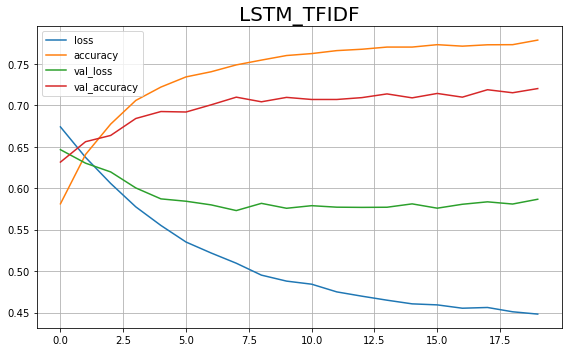

In [647]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.title('LSTM_TFIDF', fontsize=20)

plt.grid(True)
plt.tight_layout()
plt.savefig('LSTM_TFIDF', dpi=300)
plt.show

### Deep Learning Model (LSTM) - Word2vec

In [627]:
k = np.asarray(final_all[li1])
l = np.array(final_all['Stance_related'and 'Stance_unrelated'])
k_train, k_test, l_train, l_test = train_test_split(k,l, test_size=0.33, random_state=1)

In [628]:
k_train, l_test, k_train, l_test = train_test_split(k,l, test_size=0.33, random_state=1)

In [651]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10781,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [652]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [653]:
history3 = model.fit(k_train, l_train, epochs=20, batch_size=100, validation_data=(k_test, l_test))


Epoch 1/20
73/73 [==============================] - 23s 26ms/step - loss: 0.6793 - accuracy: 0.5663 - val_loss: 0.6451 - val_accuracy: 0.6415
Epoch 2/20
73/73 [==============================] - 1s 10ms/step - loss: 0.6355 - accuracy: 0.6447 - val_loss: 0.6229 - val_accuracy: 0.6661
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.5969 - accuracy: 0.6887 - val_loss: 0.6148 - val_accuracy: 0.6672
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.5741 - accuracy: 0.7114 - val_loss: 0.6016 - val_accuracy: 0.6787
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.5327 - accuracy: 0.7435 - val_loss: 0.5871 - val_accuracy: 0.6885
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.5209 - accuracy: 0.7381 - val_loss: 0.5793 - val_accuracy: 0.7061
Epoch 7/20
73/73 [==============================] - 1s 12ms/step - loss: 0.5026 - accuracy: 0.7535 - val_loss: 0.5752 - val_accuracy: 0.7002
Epoch 8/20
73/7

In [654]:
scores = model.evaluate(k_test, l_test, verbose=0)
print('Simple LSTM test score(loss value):', scores[0])
print('Simple LSTM test accuracy:', scores[1])

Simple LSTM test score(loss value): 0.5796405673027039
Simple LSTM test accuracy: 0.7237136363983154


In [660]:
%timeit history3

28.8 ns ± 0.635 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


<function matplotlib.pyplot.show(close=None, block=None)>

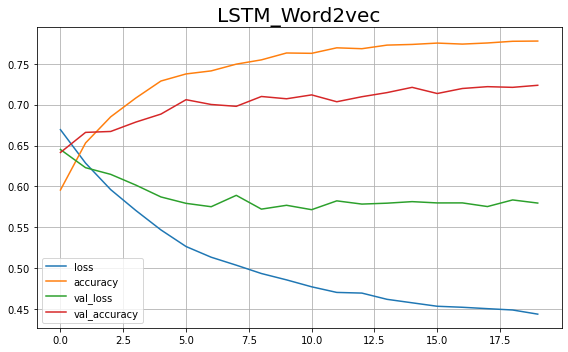

In [661]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.title('LSTM_Word2vec', fontsize=20)

plt.grid(True)
plt.tight_layout()
plt.savefig('LSTM_Word2vec', dpi=300)
plt.show

# Agree/Disagree/Discuss Classification

### Deep Learning Model (LSTM) - TF-IDF

In [264]:
Final_data_reduce

,Body ID,Stance,Headline_Token,articleBody_Token,word_count
0,403,unrelated,hairgat iphon user say devic pull hair,nasa confirm earth day almost dark monday dece...,"{'hairgat': 1, 'iphon': 1, 'user': 1, 'say': 1..."
1,964,unrelated,bigfoot stroll through russian forest at least...,syrian town report explos kurd islam state mil...,"{'bigfoot': 1, 'stroll': 1, 'through': 1, 'rus..."
2,498,unrelated,macaulay culkin dead actor onc again victim of...,twitter user could lover the owner million bug...,"{'macaulay': 1, 'culkin': 1, 'dead': 1, 'actor..."
3,1040,unrelated,priest die minut say met god woman,report islam state milit mosul contract ebola ...,"{'priest': 1, 'die': 1, 'minut': 1, 'say': 1, ..."
4,467,unrelated,pizza deliveri man get tip,time capsul back war samuel adam paul rever am...,"{'pizza': 1, 'deliveri': 1, 'man': 1, 'get': 1..."
...,...,...,...,...,...
10831,472,unrelated,audio record alleg captur moment michael brown...,american british intellig offici britishborn r...,"{'audio': 1, 'record': 1, 'alleg': 1, 'captur'..."
10832,840,discuss,hope fade girl releas after boko haram truce b...,suspect milit islamist shot peopl three nigeri...,"{'hope': 1, 'fade': 1, 'girl': 1, 'releas': 1,..."
10833,1340,agree,boko haram ceasefir doubt attack report nigeria,boko haram truce at least seem like video rele...,"{'boko': 1, 'haram': 1, 'ceasefir': 1, 'doubt'..."
10834,2403,unrelated,christian bale quit steve job movi,more miss schoolgirl kidnap islam group boko h...,"{'christian': 1, 'bale': 1, 'quit': 1, 'steve'..."


In [265]:
df1=Final_data_reduce[~Final_data_reduce['Stance'].isin(['unrelated'])]
df1

,Body ID,Stance,Headline_Token,articleBody_Token,word_count
8,1217,discuss,that was fast christian bale bail steve job bi...,from batman actor christian bale report play s...,"{'that': 1, 'was': 1, 'fast': 1, 'christian': ..."
13,1245,agree,homeless man receiv shock everyon spend,josh paler lin prankster recent tri social he ...,"{'homeless': 1, 'man': 1, 'receiv': 1, 'shock'..."
14,1840,agree,white hous fenc jumper push past femal guard,the man white hous abl run front made farther ...,"{'white': 1, 'hous': 1, 'fenc': 1, 'jumper': 1..."
16,621,discuss,slain is report doctor,us defens news airstrik iraq media leader isi ...,"{'slain': 1, 'is': 1, 'report': 1, 'doctor': 1}"
17,1594,disagree,meteorit leav crater nicaraguan capit managua,updat the stori updat new evid expert news pot...,"{'meteorit': 1, 'leav': 1, 'crater': 1, 'nicar..."
...,...,...,...,...,...
10828,1266,discuss,saudi arabia cleric issu fatwa against build s...,saudi arabian cleric report fatwa build snowme...,"{'saudi': 1, 'arabia': 1, 'cleric': 1, 'issu':..."
10830,1359,agree,comcast block tor,user tri use internet right fine account due d...,"{'comcast': 1, 'block': 1, 'tor': 1}"
10832,840,discuss,hope fade girl releas after boko haram truce b...,suspect milit islamist shot peopl three nigeri...,"{'hope': 1, 'fade': 1, 'girl': 1, 'releas': 1,..."
10833,1340,agree,boko haram ceasefir doubt attack report nigeria,boko haram truce at least seem like video rele...,"{'boko': 1, 'haram': 1, 'ceasefir': 1, 'doubt'..."


In [266]:
Final_data_reduce_stance_2 = df1[['Stance']]
Final_data_reduce_stance_2

,Stance
8,discuss
13,agree
14,agree
16,discuss
17,disagree
...,...
10828,discuss
10830,agree
10832,discuss
10833,agree


In [267]:
Final_data_Headline_2 = df1[['Headline_Token']]
Final_data_Headline_2

,Headline_Token
8,that was fast christian bale bail steve job bi...
13,homeless man receiv shock everyon spend
14,white hous fenc jumper push past femal guard
16,slain is report doctor
17,meteorit leav crater nicaraguan capit managua
...,...
10828,saudi arabia cleric issu fatwa against build s...
10830,comcast block tor
10832,hope fade girl releas after boko haram truce b...
10833,boko haram ceasefir doubt attack report nigeria


In [268]:
Final_data_body_2 = df1[['articleBody_Token']]
Final_data_body_2

,articleBody_Token
8,from batman actor christian bale report play s...
13,josh paler lin prankster recent tri social he ...
14,the man white hous abl run front made farther ...
16,us defens news airstrik iraq media leader isi ...
17,updat the stori updat new evid expert news pot...
...,...
10828,saudi arabian cleric report fatwa build snowme...
10830,user tri use internet right fine account due d...
10832,suspect milit islamist shot peopl three nigeri...
10833,boko haram truce at least seem like video rele...


In [269]:
stances_dummies_2 = pd.get_dummies(Final_data_reduce_stance_2)
stances_dummies_2

,Stance_agree,Stance_disagree,Stance_discuss
8,0,0,1
13,1,0,0
14,1,0,0
16,0,0,1
17,0,1,0
...,...,...,...
10828,0,0,1
10830,1,0,0
10832,0,0,1
10833,1,0,0


In [270]:
stances_dummies_2.index = range(len(stances_dummies_2))
stances_dummies_2

,Stance_agree,Stance_disagree,Stance_discuss
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
5413,0,0,1
5414,1,0,0
5415,0,0,1
5416,1,0,0


In [271]:
Final_data_Headline_2 = df1['word_count'] = df1['Headline_Token'].apply(word_count)

<ipython-input-271-60db98a093db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data_Headline_2 = df1['word_count'] = df1['Headline_Token'].apply(word_count)


In [272]:
v = TfidfVectorizer()
x = v.fit_transform(df1.Headline_Token)

In [273]:
Data_2 = np.array(df1.articleBody_Token)
Data_2_list = Data_2.tolist()
str_body = " ".join(Data_2_list)
print(str_body[0:15])


from batman act


In [274]:
count_vect_signature_2 = CountVectorizer(stop_words='english',lowercase=False) 
TD_counts_signature_2 = count_vect_signature_2.fit_transform(df1.articleBody_Token)
print(TD_counts_signature_2.shape) 
print(TD_counts_signature_2.dtype)
print(count_vect_signature_2.get_feature_names())

DF_TD_counts_signature_2=pd.DataFrame(TD_counts_signature_2.toarray())
print(DF_TD_counts_signature_2)

(5418, 2001)
int64
['aaron', 'abandon', 'abdel', 'abdelmaj', 'abdi', 'abduct', 'abdul', 'abdullah', 'abl', 'abort', 'abov', 'abram', 'absenc', 'absent', 'abu', 'abus', 'abuzz', 'accessori', 'accident', 'accord', 'account', 'accus', 'ach', 'action', 'actor', 'actual', 'ad', 'adam', 'add', 'addict', 'administr', 'adsupport', 'advanc', 'advic', 'advis', 'affirm', 'afghanistan', 'africa', 'age', 'agent', 'ago', 'agre', 'agreement', 'ahead', 'ahm', 'aid', 'air', 'aircraft', 'airdrop', 'airforc', 'airlin', 'airport', 'airstrik', 'al', 'alan', 'albaghdadi', 'albanian', 'aldeen', 'alert', 'align', 'aliv', 'alleg', 'allmal', 'alongsid', 'alqaeda', 'alqaida', 'alshabaab', 'alshabab', 'altern', 'amaz', 'amazon', 'amazoncom', 'america', 'american', 'amid', 'analyst', 'anarchi', 'anbar', 'anchor', 'android', 'angel', 'anger', 'angri', 'anim', 'ankl', 'ann', 'anna', 'anniversari', 'announc', 'annual', 'anoth', 'ansar', 'antiaircraft', 'antiislam', 'anyon', 'apart', 'app', 'appar', 'appear', 'appendi

In [275]:
tfidf_transformer_2 = TfidfTransformer() 
X_train_tfidf_signature_2 = tfidf_transformer_2.fit_transform(TD_counts_signature_2)
print(X_train_tfidf_signature_2.shape)
DF_TF_IDF_signature_2=pd.DataFrame(X_train_tfidf_signature_2.toarray())
print(DF_TF_IDF_signature_2)

(5418, 2001)
         0     1     2     3     4         5     6     7        8     9     \
0     0.16183   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.00000   0.0   
1     0.00000   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.00000   0.0   
2     0.00000   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.03246   0.0   
3     0.00000   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.00000   0.0   
4     0.00000   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.00000   0.0   
...       ...   ...   ...   ...   ...       ...   ...   ...      ...   ...   
5413  0.00000   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.00000   0.0   
5414  0.00000   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.00000   0.0   
5415  0.00000   0.0   0.0   0.0   0.0  0.041209   0.0   0.0  0.00000   0.0   
5416  0.00000   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.00000   0.0   
5417  0.00000   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  0.00000   0.0   

      ...  1991  1992  1993  1994  1995  1996  199

In [276]:
count_vect_signature_3 = CountVectorizer(stop_words='english',lowercase=False) 
TD_counts_signature_3 = count_vect_signature_3.fit_transform(df1.Headline_Token)
print(TD_counts_signature_3.shape) 
print(TD_counts_signature_3.dtype)
print(count_vect_signature_3.get_feature_names())

DF_TD_counts_signature_3 =pd.DataFrame(TD_counts_signature_3.toarray())
print(DF_TD_counts_signature_3)

(5418, 2231)
int64
['aaron', 'abandon', 'abdel', 'abdelmaj', 'abdi', 'abduct', 'abdul', 'abdullah', 'abl', 'abort', 'abram', 'absenc', 'absent', 'abu', 'abus', 'abuzz', 'accessori', 'accident', 'accord', 'account', 'accus', 'ach', 'action', 'actor', 'actual', 'ad', 'adam', 'add', 'addict', 'administr', 'adsupport', 'adult', 'adulteress', 'advanc', 'advisoryislamist', 'affili', 'afghanistan', 'africa', 'age', 'agent', 'ago', 'agonis', 'agre', 'agreement', 'ahead', 'ahm', 'aid', 'air', 'aircraft', 'airdrop', 'airforc', 'airlin', 'airport', 'airspac', 'airstrik', 'al', 'alan', 'alarm', 'albaghdadi', 'albanian', 'aldeen', 'alert', 'align', 'aliv', 'alleg', 'alleyway', 'allmal', 'allnew', 'allow', 'alongsid', 'alqaeda', 'alqaida', 'alshabaab', 'alshabab', 'alsig', 'altern', 'amaz', 'amazon', 'amazoncom', 'america', 'american', 'amid', 'ammo', 'analyst', 'anbar', 'android', 'angel', 'angri', 'anim', 'ankl', 'ann', 'anna', 'anniversari', 'announc', 'annual', 'anoth', 'ansar', 'antiaircraft', 

In [277]:
DF_TD_counts_signature_3

,0,1,2,3,4,5,6,7,8,9,...,2221,2222,2223,2224,2225,2226,2227,2228,2229,2230
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
tfidf_transformer = TfidfTransformer() 
X_train_tfidf_signature_3 = tfidf_transformer.fit_transform(TD_counts_signature_3)
print(X_train_tfidf_signature_3.shape)
DF_TF_IDF_signature_3=pd.DataFrame(X_train_tfidf_signature_3.toarray())
print(DF_TF_IDF_signature_3)

(5418, 2231)
      0     1     2     3     4     5     6     7     8     9     ...  2221  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
5413   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5414   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5415   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5416   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5417   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      2222  2223  2224  2225  2226  22

In [280]:
drop_2 = DF_TF_IDF_signature_3.sample(n=230,replace=False, weights=None, random_state=1, axis=1)
drop_headline_2 = DF_TF_IDF_signature_3.drop(drop_2, axis=1)
drop_headline_2

,0,1,2,3,4,5,7,8,9,10,...,2221,2222,2223,2224,2225,2226,2227,2228,2229,2230
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [284]:
o = np.array(DF_TF_IDF_signature_2)
o

array([[0.16183015, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [285]:
s = np.array(drop_headline_2)
s

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [286]:
from sklearn.metrics.pairwise import cosine_similarity

h = cosine_similarity(o,s)
h

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00659011, 0.01709545, ..., 0.00986033, 0.03753869,
        0.01581415],
       ...,
       [0.        , 0.00755266, 0.        , ..., 0.        , 0.0161621 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.14245961,
        0.        ],
       [0.057261  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19018337]])

In [287]:
h_pd = pd.DataFrame(h)
h_pd

,0,1,2,3,4,5,6,7,8,9,...,5408,5409,5410,5411,5412,5413,5414,5415,5416,5417
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.034358,0.00000,0.000000,0.000000
2,0.000000,0.006590,0.017095,0.000000,0.0,0.004953,0.018671,0.000000,0.000000,0.019437,...,0.000000,0.018985,0.010743,0.010143,0.0,0.000000,0.029823,0.00986,0.037539,0.015814
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.099824,0.035181,...,0.000000,0.000000,0.000000,0.018359,0.0,0.000000,0.000000,0.00000,0.000000,0.028623
4,0.000000,0.006531,0.000000,0.075411,0.0,0.012958,0.006311,0.021481,0.040996,0.000000,...,0.000000,0.010186,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.018602,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,0.000000,0.043742,0.000000,0.000000,0.0,0.032872,0.042265,0.000000,0.049400,0.000000,...,0.000000,0.000000,0.000000,0.058740,0.0,0.000000,0.000000,0.00000,0.062291,0.000000
5414,0.000000,0.000000,0.000000,0.000000,0.0,0.050750,0.000000,0.000000,0.000000,0.000000,...,0.028938,0.021486,0.000000,0.047256,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
5415,0.000000,0.007553,0.000000,0.000000,0.0,0.005676,0.007298,0.000000,0.000000,0.000000,...,0.000000,0.011161,0.000000,0.006762,0.0,0.017551,0.022786,0.00000,0.016162,0.000000
5416,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.019866,0.0,0.000000,0.000000,0.00000,0.142460,0.000000


In [288]:
z2 = drop_headline_2.columns.values.tolist()
z2

[0,
 1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 104,
 105,
 106,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 196,
 197,
 198,
 199,
 200,
 202,
 20

In [289]:
final_allll = pd.concat([h_pd, stances_dummies_2],axis=1)
final_allll

,0,1,2,3,4,5,6,7,8,9,...,5411,5412,5413,5414,5415,5416,5417,Stance_agree,Stance_disagree,Stance_discuss
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,1
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.034358,0.00000,0.000000,0.000000,1,0,0
2,0.000000,0.006590,0.017095,0.000000,0.0,0.004953,0.018671,0.000000,0.000000,0.019437,...,0.010143,0.0,0.000000,0.029823,0.00986,0.037539,0.015814,1,0,0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.099824,0.035181,...,0.018359,0.0,0.000000,0.000000,0.00000,0.000000,0.028623,0,0,1
4,0.000000,0.006531,0.000000,0.075411,0.0,0.012958,0.006311,0.021481,0.040996,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.018602,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,0.000000,0.043742,0.000000,0.000000,0.0,0.032872,0.042265,0.000000,0.049400,0.000000,...,0.058740,0.0,0.000000,0.000000,0.00000,0.062291,0.000000,0,0,1
5414,0.000000,0.000000,0.000000,0.000000,0.0,0.050750,0.000000,0.000000,0.000000,0.000000,...,0.047256,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0
5415,0.000000,0.007553,0.000000,0.000000,0.0,0.005676,0.007298,0.000000,0.000000,0.000000,...,0.006762,0.0,0.017551,0.022786,0.00000,0.016162,0.000000,0,0,1
5416,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019866,0.0,0.000000,0.000000,0.00000,0.142460,0.000000,1,0,0


In [662]:
li1_2 = list(range(0,5417))

In [663]:
kk = np.asarray(final_allll[li1_2])
ll = np.array(final_allll['Stance_agree'and 'Stance_disagree'and'Stance_discuss'])
kk_train, kk_test, ll_train, ll_test = train_test_split(kk,ll, test_size=0.33, random_state=1)

In [685]:
model_2 = Sequential()
model_2.add(Dense(16, activation='relu', input_shape=((5417,))))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(16, activation='relu'))

model_2.add(Dense(1, activation='softmax'))


In [686]:
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [687]:
history2 = model_2.fit(kk_train, ll_train, epochs=20, batch_size=100, validation_data=(kk_test, ll_test))


Epoch 1/20
37/37 [==============================] - 2s 17ms/step - loss: 0.0000e+00 - accuracy: 0.6691 - val_loss: 0.0000e+00 - val_accuracy: 0.6689
Epoch 2/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.6635 - val_loss: 0.0000e+00 - val_accuracy: 0.6689
Epoch 3/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.6729 - val_loss: 0.0000e+00 - val_accuracy: 0.6689
Epoch 4/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.6629 - val_loss: 0.0000e+00 - val_accuracy: 0.6689
Epoch 5/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6409 - val_loss: 0.0000e+00 - val_accuracy: 0.6689
Epoch 6/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.6616 - val_loss: 0.0000e+00 - val_accuracy: 0.6689
Epoch 7/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.6738 - val_los

In [683]:
scores = model_2.evaluate(kk_test, ll_test, verbose=0)
print('Simple LSTM test score(loss value):', scores[0])
print('Simple LSTM test accuracy:', scores[1])

Simple LSTM test score(loss value): 0.0
Simple LSTM test accuracy: 0.6689038276672363


<function matplotlib.pyplot.show(close=None, block=None)>

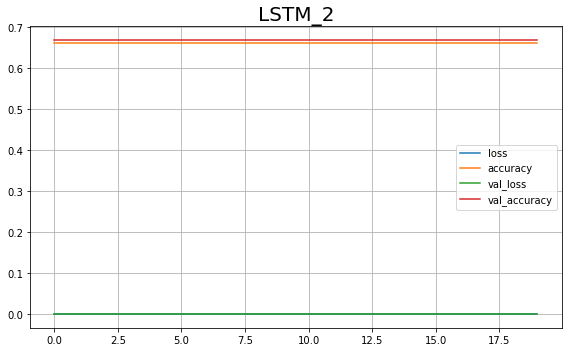

In [688]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.title('LSTM_2', fontsize=20)

plt.grid(True)
plt.tight_layout()
plt.savefig('LSTM_2', dpi=300)
plt.show

In [689]:
%timeit history2

25.6 ns ± 0.458 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Two Models Combination and Testing

In [527]:
test_body = pd.read_csv("competition_test_bodies.csv")
test_body

,Body ID,articleBody
0,1,Al-Sisi has denied Israeli reports stating tha...
1,2,A bereaved Afghan mother took revenge on the T...
2,3,CNBC is reporting Tesla has chosen Nevada as t...
3,12,A 4-inch version of the iPhone 6 is said to be...
4,19,GR editor’s Note\n\nThere are no reports in th...
...,...,...
899,2582,"Congressional Republicans, evidently hoping th..."
900,2583,Did Obamacare work?\n\nIt’s worth reflecting u...
901,2584,Millions may lose coverage next year if Congre...
902,2585,"Come November, the grim trudge across the incr..."


In [528]:
test_headline = pd.read_csv("competition_test_stances.csv")
test_headline

,Headline,Body ID,Stance
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated
...,...,...,...
25408,The success of the Affordable Care Act is a hu...,2582,agree
25409,The success of the Affordable Care Act is a hu...,2583,discuss
25410,The success of the Affordable Care Act is a hu...,2584,disagree
25411,The success of the Affordable Care Act is a hu...,2585,disagree


In [530]:
test = test_headline.join(test_body.set_index('Body ID').sum(axis=1).to_frame('articleBody'), on='Body ID')
test

,Headline,Body ID,Stance,articleBody
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated,A RESPECTED senior French police officer inves...
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated,Dave Morin's social networking company Path is...
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated,A bereaved Afghan mother took revenge on the T...
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated,Hewlett-Packard is officially splitting in two...
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated,An airline passenger headed to Dallas was remo...
...,...,...,...,...
25408,The success of the Affordable Care Act is a hu...,2582,agree,"Congressional Republicans, evidently hoping th..."
25409,The success of the Affordable Care Act is a hu...,2583,discuss,Did Obamacare work?\n\nIt’s worth reflecting u...
25410,The success of the Affordable Care Act is a hu...,2584,disagree,Millions may lose coverage next year if Congre...
25411,The success of the Affordable Care Act is a hu...,2585,disagree,"Come November, the grim trudge across the incr..."


In [531]:
test_sample = test.sample(n=10000, replace=False, weights=None, random_state=1, axis=0)
test_sample

,Headline,Body ID,Stance,articleBody
19954,Man Kicked Off Flight Thanks to His Burning Ha...,2023,unrelated,Debate is raging online as to whether pic show...
11235,Jasmine Tridevil Has Surgery 'To Add Third Bre...,2301,disagree,The woman who reported adding a third breast w...
15626,Three-breasted woman outed as fake by Tampa po...,1811,unrelated,"Last night, Pando reported that Apple is about..."
4886,British Jihadi Killed In US Airstrike - Reports,1736,unrelated,IBM may be set to announce big layoffs this we...
11033,South Korean woman freed by firefighters after...,1452,unrelated,LOS ANGELES (CBS Seattle/AP) — A scorpion stun...
...,...,...,...,...
7433,Video purports to show beheading of US journalist,1964,unrelated,"Last week, Apple sent out the invites for its ..."
24756,Saudi Arabian Airline Rep Denies Plan to Separ...,2100,unrelated,The man behind the world famous 50ft Crabzilla...
23200,Brain op shock as teen wakes up mid-surgery,400,unrelated,A report emerged yesterday alleging the busine...
16223,Is this Crabzilla? 'Giant crab' measuring 50ft...,2500,unrelated,(CNN) -- Joan Rivers' personal throat doctor d...


In [534]:
test_set = test_sample.sample(frac=1).reset_index(drop=True)
test_set

,Headline,Body ID,Stance,articleBody
0,CNN: Doctor Took Mid-Surgery Selfie with Uncon...,810,unrelated,A Russian fisherman says the only thing that p...
1,"IBM To Cut More Than 110,000 Jobs, Report Says",1043,unrelated,Saudi Arabia's national carrier Saudi is plann...
2,"The story of the Argentinean president, werewo...",1246,unrelated,And now for a story that will warm you all the...
3,Joan Rivers Death Preventable? Melissa Rivers ...,946,unrelated,"Last night, Pando’s Michael Carney cited a wel..."
4,Apple Reported to Begin Shipping Apple Watch i...,1229,discuss,Apple is forecast to have shipped a whopping 7...
...,...,...,...,...
9995,Apple was forced to nix key health features fr...,2383,unrelated,"Cristina Kirchner, the president of Argentina,..."
9996,Apple was forced to nix key health features fr...,1941,unrelated,A real-life Auntie Maim is facing five years i...
9997,"Argentina President, Christina Kirchner, Has B...",1124,unrelated,It’s a well-known fact that a woman’s jealousy...
9998,ISIS Is Reportedly Trying To Sell James Foley'...,164,discuss,Islamic State terrorists couldn’t strike ranso...


In [535]:
test_Headline = test_set[['Headline']]
test_articleBody = test_set[['articleBody']]

In [536]:
test_txt = test_set.to_csv('test.txt',sep='\t',index=False, header=None)
test_Headline_txt = test_Headline.to_csv('test_Headline.txt',sep='\t',index=True, header=None)
test_articleBody_txt = test_articleBody.to_csv('test_articleBody.txt',sep='\t',index=True, header=None)

In [537]:
test_txt = 'test.txt'
text2 = load_doc(test_txt)
tokens2 = clean_doc(text2)

In [538]:
str_test = " ".join(tokens2)

In [539]:
file = open('test_clean.txt','w');

file.write(str(tokens2));

file.close();

In [540]:
test_Headline_txt = 'test_Headline.txt'
text3 = load_doc(test_Headline_txt)
Headline_tokens_2 = clean_doc(text3)

In [541]:
Headline_tokens_2 = set(Headline_tokens_2)

In [543]:
line_2 = []
for i in range(len(test_Headline)):
    for l in test_Headline.iloc[i]:
        l = clean_doc(l)
        line_2.append(' '.join(l))

In [544]:
test_headline_new = DataFrame(line_2,columns=['test_headline_new'])
test_headline_new

,test_headline_new
0,CNN Doctor Took MidSurgery Selfie Unconscious ...
1,IBM To Cut More Than Jobs Report Says
2,The story Argentinean president werewolves sev...
3,Joan Rivers Death Preventable Melissa Rivers T...
4,Apple Reported Begin Shipping Apple Watch Marc...
...,...
9995,Apple forced nix key health features smartwatc...
9996,Apple forced nix key health features smartwatc...
9997,Argentina President Christina Kirchner Has Biz...
9998,ISIS Is Reportedly Trying To Sell James Foleys...


In [545]:
test_articleBody_txt = 'test_articleBody.txt'
text4 = load_doc(test_articleBody_txt)
ArticleBody_tokens_2 = clean_doc(text4)

In [546]:
lines = []
for i in range(len(test_articleBody)):
    for line in test_articleBody.iloc[i]:
        line = [line]
        lines = lines + line

In [547]:
line = []
for i in range(len(test_articleBody)):
    for l in test_articleBody.iloc[i]:
        l = clean_doc(l)
        l = [w for w in l if w in Headline_tokens_2]
        line.append(' '.join(l))

In [548]:
test_articleBody_new = DataFrame(line,columns=['test_articleBody_new'])
test_articleBody_new

,test_articleBody_new
0,Russian fisherman says bear killing Justin rin...
1,Saudi Arabias national Saudi planning introduc...
2,And story way And cold outside even Los Angele...
3,Last night Michael source claims Apple buying ...
4,Apple forecast million iPhones quarter iPhone ...
...,...
9995,Cristina Kirchner president Argentina Jewish b...
9996,five cut penis The He toilet wanted phone boy ...
9997,wife cheated husband In wife China reported ch...
9998,Islamic State strike ransom United trade hosta...


In [549]:
test1 = test_set.drop(columns='Headline')
test2 = test1.drop(columns='articleBody')

test_clean = pd.concat([test_headline_new, test2, test_articleBody_new], axis=1)
test_clean

,test_headline_new,Body ID,Stance,test_articleBody_new
0,CNN Doctor Took MidSurgery Selfie Unconscious ...,810,unrelated,Russian fisherman says bear killing Justin rin...
1,IBM To Cut More Than Jobs Report Says,1043,unrelated,Saudi Arabias national Saudi planning introduc...
2,The story Argentinean president werewolves sev...,1246,unrelated,And story way And cold outside even Los Angele...
3,Joan Rivers Death Preventable Melissa Rivers T...,946,unrelated,Last night Michael source claims Apple buying ...
4,Apple Reported Begin Shipping Apple Watch Marc...,1229,discuss,Apple forecast million iPhones quarter iPhone ...
...,...,...,...,...
9995,Apple forced nix key health features smartwatc...,2383,unrelated,Cristina Kirchner president Argentina Jewish b...
9996,Apple forced nix key health features smartwatc...,1941,unrelated,five cut penis The He toilet wanted phone boy ...
9997,Argentina President Christina Kirchner Has Biz...,1124,unrelated,wife cheated husband In wife China reported ch...
9998,ISIS Is Reportedly Trying To Sell James Foleys...,164,discuss,Islamic State strike ransom United trade hosta...


In [550]:
stemmer =PorterStemmer()
test_clean['test_Headline_stemmer'] = test_clean['test_headline_new'].apply(word_tokenize) 

stemmer = SnowballStemmer("english")
test_Headline_data = pd.DataFrame() 
test_Headline_data =test_clean.drop(columns=["test_Headline_stemmer","test_headline_new"])
test_Headline_data['test_Headline_Token'] = test_clean['test_Headline_stemmer'].apply(lambda x: [stemmer.stem(y) for y in x]) 

test_Headline_data['test_Headline_Token'] = test_Headline_data['test_Headline_Token'].apply(lambda x: " ".join(x)) 

print(test_Headline_data.shape)
print(test_Headline_data.head())

(10000, 4)
   Body ID     Stance                               test_articleBody_new  \
0      810  unrelated  Russian fisherman says bear killing Justin rin...   
1     1043  unrelated  Saudi Arabias national Saudi planning introduc...   
2     1246  unrelated  And story way And cold outside even Los Angele...   
3      946  unrelated  Last night Michael source claims Apple buying ...   
4     1229    discuss  Apple forecast million iPhones quarter iPhone ...   

                                 test_Headline_Token  
0  cnn doctor took midsurgeri selfi unconsci joan...  
1                ibm to cut more than job report say  
2  the stori argentinean presid werewolv seventh son  
3  joan river death prevent melissa river take le...  
4  appl report begin ship appl watch march macboo...  


In [552]:
stemmer =PorterStemmer()
test_Headline_data['test_articleBody_stemmer'] = test_Headline_data['test_articleBody_new'].apply(word_tokenize) 

stemmer = SnowballStemmer("english")
Final_test_reduce = pd.DataFrame() 
Final_test_reduce = test_Headline_data.drop(columns=["test_articleBody_stemmer","test_articleBody_new"])
Final_test_reduce['test_articleBody_Token'] = test_Headline_data['test_articleBody_stemmer'].apply(lambda x: [stemmer.stem(y) for y in x]) 
Final_test_reduce['test_articleBody_Token'] = Final_test_reduce['test_articleBody_Token'].apply(lambda x: " ".join(x)) 

print(Final_test_reduce.shape)
print(Final_test_reduce.head())

(10000, 4)
   Body ID     Stance                                test_Headline_Token  \
0      810  unrelated  cnn doctor took midsurgeri selfi unconsci joan...   
1     1043  unrelated                ibm to cut more than job report say   
2     1246  unrelated  the stori argentinean presid werewolv seventh son   
3      946  unrelated  joan river death prevent melissa river take le...   
4     1229    discuss  appl report begin ship appl watch march macboo...   

                              test_articleBody_Token  
0  russian fisherman say bear kill justin rington...  
1  saudi arabia nation saudi plan introduc new wo...  
2  and stori way and cold outsid even los angel i...  
3  last night michael sourc claim appl buy social...  
4  appl forecast million iphon quarter iphon one ...  


In [553]:
Final_test_reduce

,Body ID,Stance,test_Headline_Token,test_articleBody_Token
0,810,unrelated,cnn doctor took midsurgeri selfi unconsci joan...,russian fisherman say bear kill justin rington...
1,1043,unrelated,ibm to cut more than job report say,saudi arabia nation saudi plan introduc new wo...
2,1246,unrelated,the stori argentinean presid werewolv seventh son,and stori way and cold outsid even los angel i...
3,946,unrelated,joan river death prevent melissa river take le...,last night michael sourc claim appl buy social...
4,1229,discuss,appl report begin ship appl watch march macboo...,appl forecast million iphon quarter iphon one ...
...,...,...,...,...
9995,2383,unrelated,appl forc nix key health featur smartwatch report,cristina kirchner presid argentina jewish boy ...
9996,1941,unrelated,appl forc nix key health featur smartwatch report,five cut peni the he toilet want phone boy wen...
9997,1124,unrelated,argentina presid christina kirchner has bizarr...,wife cheat husband in wife china report chop p...
9998,164,discuss,isi is report tri to sell jame foley remain fo...,islam state strike ransom unit trade hostag mo...


In [554]:
Final_test_reduce_stance = Final_test_reduce[['Stance']]
Final_test_reduce_stance

,Stance
0,unrelated
1,unrelated
2,unrelated
3,unrelated
4,discuss
...,...
9995,unrelated
9996,unrelated
9997,unrelated
9998,discuss


In [555]:
Final_test_Headline = Final_test_reduce[['test_Headline_Token']]
Final_test_Headline

,test_Headline_Token
0,cnn doctor took midsurgeri selfi unconsci joan...
1,ibm to cut more than job report say
2,the stori argentinean presid werewolv seventh son
3,joan river death prevent melissa river take le...
4,appl report begin ship appl watch march macboo...
...,...
9995,appl forc nix key health featur smartwatch report
9996,appl forc nix key health featur smartwatch report
9997,argentina presid christina kirchner has bizarr...
9998,isi is report tri to sell jame foley remain fo...


In [556]:
Final_test_Headline.to_csv('Final_test_Headline.txt',sep='\t',index=False, header=None)

In [557]:
np_test_headline = np.array(Final_test_Headline)

In [558]:
Final_test_body = Final_test_reduce[['test_articleBody_Token']]
Final_test_body

,test_articleBody_Token
0,russian fisherman say bear kill justin rington...
1,saudi arabia nation saudi plan introduc new wo...
2,and stori way and cold outsid even los angel i...
3,last night michael sourc claim appl buy social...
4,appl forecast million iphon quarter iphon one ...
...,...
9995,cristina kirchner presid argentina jewish boy ...
9996,five cut peni the he toilet want phone boy wen...
9997,wife cheat husband in wife china report chop p...
9998,islam state strike ransom unit trade hostag mo...


In [559]:
np_test_body = np.array(Final_test_body)

In [560]:
Final_test_Headline = Final_test_reduce['word_count'] = Final_test_reduce['test_Headline_Token'].apply(word_count)

In [561]:
vv = TfidfVectorizer()
xx = vv.fit_transform(Final_test_reduce.test_Headline_Token)

In [563]:
count_vect_signaturee = CountVectorizer(stop_words='english',lowercase=False) 
TD_counts_signaturee = count_vect_signaturee.fit_transform(Final_test_reduce.test_articleBody_Token)
print(TD_counts_signaturee.shape) 
print(TD_counts_signaturee.dtype)
print(count_vect_signaturee.get_feature_names())

DF_TD_counts_signaturee=pd.DataFrame(TD_counts_signaturee.toarray())
print(DF_TD_counts_signaturee)

(10000, 1364)
int64
['abba', 'abc', 'abu', 'abus', 'accessori', 'accident', 'accord', 'accus', 'acid', 'acquir', 'act', 'action', 'actual', 'ad', 'add', 'addict', 'administr', 'adopt', 'advanc', 'affair', 'afford', 'afghan', 'afghani', 'africa', 'afton', 'age', 'agent', 'agoni', 'ahead', 'aid', 'air', 'airlin', 'airport', 'airstrik', 'al', 'alaska', 'albaghdadi', 'albritani', 'alcorn', 'alisha', 'aliv', 'alleg', 'alli', 'alqaeda', 'alsisi', 'alumnus', 'alway', 'amaz', 'amazon', 'ambassador', 'america', 'american', 'ami', 'amid', 'analyst', 'anesthesia', 'anesthet', 'angel', 'angri', 'ani', 'anim', 'ankl', 'announc', 'anoth', 'ap', 'apart', 'app', 'appal', 'appar', 'appear', 'appl', 'april', 'arab', 'arabia', 'arabian', 'aramco', 'argentin', 'argentina', 'argentinean', 'argentinian', 'arm', 'armi', 'arrest', 'arriv', 'artist', 'ask', 'assign', 'ate', 'attack', 'attempt', 'attent', 'attract', 'attribut', 'aunt', 'authent', 'avail', 'aveng', 'avoid', 'aw', 'awaken', 'away', 'awesom', 'bab

In [564]:
tfidf_transformerr = TfidfTransformer() 
X_train_tfidf_signaturee = tfidf_transformerr.fit_transform(TD_counts_signaturee)
print(X_train_tfidf_signaturee.shape)
DF_TF_IDF_signaturee=pd.DataFrame(X_train_tfidf_signaturee.toarray())
print(DF_TF_IDF_signaturee)

(10000, 1364)
      0     1     2     3     4         5     6     7     8     9     ...  \
0      0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
1      0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
2      0.0   0.0   0.0   0.0   0.0  0.086723   0.0   0.0   0.0   0.0  ...   
3      0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
4      0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
...    ...   ...   ...   ...   ...       ...   ...   ...   ...   ...  ...   
9995   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
9996   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
9997   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
9998   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
9999   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   

      1354  1355  1356  1357      1358  1359  1360  1361  136

In [565]:
count_vect_signaturee = CountVectorizer(stop_words='english',lowercase=False) 
TD_counts_signature_2 = count_vect_signaturee.fit_transform(Final_test_reduce.test_Headline_Token)
print(TD_counts_signature_2.shape) 
print(TD_counts_signature_2.dtype)
print(count_vect_signaturee.get_feature_names())

DF_TD_counts_signature_2 =pd.DataFrame(TD_counts_signature_2.toarray())
print(DF_TD_counts_signature_2)

(10000, 1656)
int64
['abba', 'abc', 'abu', 'abus', 'accessori', 'accident', 'accord', 'account', 'accur', 'accus', 'acid', 'acquir', 'act', 'action', 'actual', 'ad', 'add', 'addict', 'adjust', 'administr', 'admit', 'adopt', 'advanc', 'affair', 'affili', 'afford', 'afghan', 'afghani', 'africa', 'afton', 'age', 'agent', 'agoni', 'ahead', 'aid', 'air', 'airlin', 'airport', 'airstrik', 'al', 'alaska', 'albaghdadi', 'albritani', 'alcorn', 'alisha', 'aliv', 'alleg', 'alli', 'alloy', 'alqaeda', 'alsisi', 'altern', 'alumnus', 'alway', 'amaz', 'amazon', 'ambassador', 'ambush', 'america', 'american', 'ami', 'amid', 'amput', 'analyst', 'anesthesia', 'anesthet', 'angel', 'angri', 'ani', 'anim', 'ankl', 'announc', 'anoth', 'ap', 'apart', 'app', 'appal', 'appar', 'appear', 'appl', 'apprehend', 'april', 'arab', 'arabia', 'arabian', 'aramco', 'argentin', 'argentina', 'argentinean', 'argentinian', 'arm', 'armi', 'arrest', 'arriv', 'arteri', 'artist', 'asinin', 'ask', 'assassin', 'assign', 'assur', 'ate

In [566]:
tfidf_transformerr = TfidfTransformer() 
X_train_tfidf_signature_2 = tfidf_transformerr.fit_transform(TD_counts_signature_2)
print(X_train_tfidf_signature_2.shape)
DF_TF_IDF_signature_2=pd.DataFrame(X_train_tfidf_signature_2.toarray())
print(DF_TF_IDF_signature_2)

(10000, 1656)
      0     1     2     3     4     5     6     7     8     9     ...  1646  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
9995   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
9996   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
9997   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
9998   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
9999   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      1647  1648  1649  1650  1651  1

In [568]:
droppp = DF_TF_IDF_signature_2.sample(n=292,replace=False, weights=None, random_state=None, axis=1)
droppp_headline = DF_TF_IDF_signature_2.drop(droppp, axis=1)
droppp_headline

,2,3,4,6,7,8,9,10,11,12,...,1643,1644,1645,1646,1647,1649,1650,1653,1654,1655
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [569]:
bb = np.array(DF_TF_IDF_signaturee)
bb

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [570]:
cc = np.array(droppp_headline)
cc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [571]:
dd = cosine_similarity(bb,cc)
dd

array([[0.        , 0.03999288, 0.        , ..., 0.        , 0.        ,
        0.08307085],
       [0.0558153 , 0.        , 0.        , ..., 0.        , 0.11380913,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.05525181,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02197137],
       [0.03699924, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [572]:
dd_pd = pd.DataFrame(dd)
dd_pd

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.000000,0.039993,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.036096,0.000000,...,0.0,0.0,0.000000,0.028978,0.0,0.000000,0.000000,0.0,0.000000,0.083071
1,0.055815,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.104009,0.000000,0.000000,...,0.0,0.0,0.000000,0.120742,0.0,0.061974,0.061974,0.0,0.113809,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.028446,0.000000,0.000000,...,0.0,0.0,0.019123,0.033022,0.0,0.034554,0.034554,0.0,0.000000,0.000000
3,0.030493,0.000000,0.0,0.000000,0.036361,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.041869,0.041869,0.0,0.000000,0.032013
4,0.028275,0.000000,0.0,0.000000,0.000000,0.0,0.045450,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.000000,0.0,0.131384,0.099155,0.0,0.000000,0.017273,0.000000,0.000000,...,0.0,0.0,0.000000,0.020052,0.0,0.000000,0.000000,0.0,0.000000,0.000000
9996,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
9997,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.025153,0.000000,0.0,0.000000,0.000000,0.0,0.055252,0.000000
9998,0.000000,0.000000,0.0,0.029838,0.000000,0.0,0.000000,0.000000,0.000000,0.021477,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.021971


In [573]:
stances_classification_3 = Final_test_reduce_stance.replace(('agree','disagree','discuss'), 'related')
stances_classification_3

,Stance
0,unrelated
1,unrelated
2,unrelated
3,unrelated
4,related
...,...
9995,unrelated
9996,unrelated
9997,unrelated
9998,related


In [575]:
stances_test_dummies = pd.get_dummies(stances_classification_3)
stances_test_dummies

,Stance_related,Stance_unrelated
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,1,0


In [576]:
stances_test_dummies.index = range(len(stances_test_dummies))
stances_test_dummies

,Stance_related,Stance_unrelated
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,1,0


In [577]:
final_test_all = pd.concat([dd_pd, stances_test_dummies],axis=1)
final_test_all

,0,1,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,Stance_related,Stance_unrelated
0,0.000000,0.039993,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.036096,0.000000,...,0.000000,0.028978,0.0,0.000000,0.000000,0.0,0.000000,0.083071,0,1
1,0.055815,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.104009,0.000000,0.000000,...,0.000000,0.120742,0.0,0.061974,0.061974,0.0,0.113809,0.000000,0,1
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.028446,0.000000,0.000000,...,0.019123,0.033022,0.0,0.034554,0.034554,0.0,0.000000,0.000000,0,1
3,0.030493,0.000000,0.0,0.000000,0.036361,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.041869,0.041869,0.0,0.000000,0.032013,0,1
4,0.028275,0.000000,0.0,0.000000,0.000000,0.0,0.045450,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.000000,0.0,0.131384,0.099155,0.0,0.000000,0.017273,0.000000,0.000000,...,0.000000,0.020052,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,1
9996,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,1
9997,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.025153,0.000000,0.0,0.000000,0.000000,0.0,0.055252,0.000000,0,1
9998,0.000000,0.000000,0.0,0.029838,0.000000,0.0,0.000000,0.000000,0.000000,0.021477,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.021971,1,0


In [578]:
li1_test = list(range(0,9999))

In [579]:
stances_classification_3_np = np.array(stances_test_dummies)
stances_classification_3_np

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [580]:
labels_test = np.array(final_test_all['Stance_related'and 'Stance_unrelated'])

In [581]:
np_final_test = np.hstack((dd,stances_classification_3_np))
np_final_test

array([[0.        , 0.03999288, 0.        , ..., 0.08307085, 0.        ,
        1.        ],
       [0.0558153 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.02197137, 1.        ,
        0.        ],
       [0.03699924, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [582]:
datapoints_test = final_test_all.drop('Stance_related'and 'Stance_unrelated', axis=1).values


In [583]:
kkk = np.asarray(final_test_all[li1_test])
lll = np.array(final_test_all['Stance_related'and 'Stance_unrelated'])

In [584]:
kkk_train, kkk_test, lll_train, lll_test = train_test_split(kkk,lll, test_size=0.33, random_state=1)

In [700]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(9999,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [701]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [702]:
history3 = model.fit(kkk_train, lll_train, epochs=20, batch_size=100, validation_data=(kkk_test, lll_test))

Epoch 1/20
67/67 [==============================] - 1s 11ms/step - loss: 0.6269 - accuracy: 0.7085 - val_loss: 0.5666 - val_accuracy: 0.7109
Epoch 2/20
67/67 [==============================] - 0s 7ms/step - loss: 0.5490 - accuracy: 0.7246 - val_loss: 0.5382 - val_accuracy: 0.7342
Epoch 3/20
67/67 [==============================] - 0s 7ms/step - loss: 0.5101 - accuracy: 0.7686 - val_loss: 0.5290 - val_accuracy: 0.7600
Epoch 4/20
67/67 [==============================] - 0s 7ms/step - loss: 0.4886 - accuracy: 0.7902 - val_loss: 0.5049 - val_accuracy: 0.7842
Epoch 5/20
67/67 [==============================] - 0s 7ms/step - loss: 0.4642 - accuracy: 0.8039 - val_loss: 0.4999 - val_accuracy: 0.7903
Epoch 6/20
67/67 [==============================] - 0s 7ms/step - loss: 0.4537 - accuracy: 0.8048 - val_loss: 0.4906 - val_accuracy: 0.7921
Epoch 7/20
67/67 [==============================] - 1s 8ms/step - loss: 0.4463 - accuracy: 0.8134 - val_loss: 0.4916 - val_accuracy: 0.7945
Epoch 8/20
67/67 [=

In [703]:
scores = model.evaluate(kkk_test, lll_test, verbose=0)
print('Simple LSTM test score(loss value):', scores[0])
print('Simple LSTM test accuracy:', scores[1])

Simple LSTM test score(loss value): 0.4537028670310974
Simple LSTM test accuracy: 0.8063636422157288


In [704]:
%timeit history3

29.3 ns ± 0.768 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


<function matplotlib.pyplot.show(close=None, block=None)>

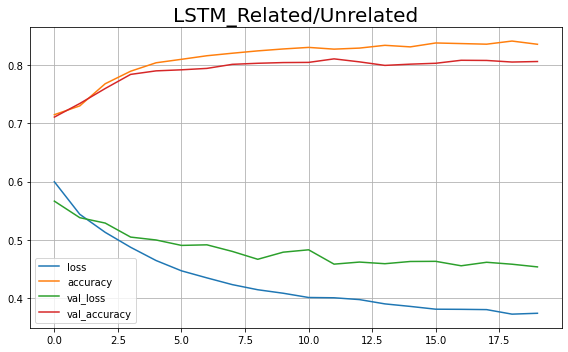

In [705]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.title('LSTM_Related/Unrelated', fontsize=20)

plt.grid(True)
plt.tight_layout()
plt.savefig('LSTM_step 1', dpi=300)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

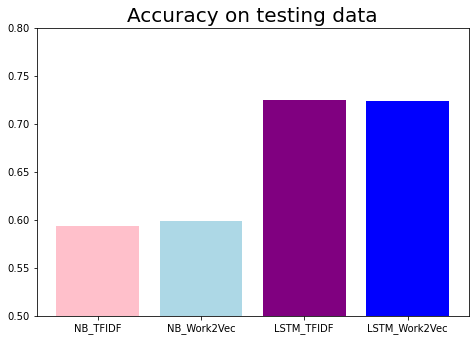

In [716]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
technique  = ['NB_TFIDF', 'NB_Work2Vec', 'LSTM_TFIDF','LSTM_Work2Vec']

Accuracy = [0.5934,0.5993,0.7246,0.7237]
plt.title('Accuracy on testing data', fontsize=20)
plt.ylim(0.5, 0.8)
ax.bar(technique ,Accuracy)
plt.bar(technique,Accuracy,color=['pink','lightblue','purple','blue'])

plt.savefig('Accuracy on testing data', dpi=300, bbox_inches = "tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

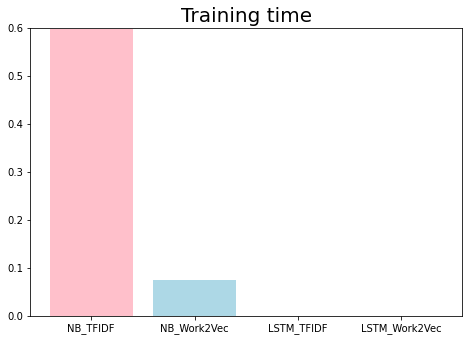

In [715]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
technique  = ['NB_TFIDF', 'NB_Work2Vec', 'LSTM_TFIDF','LSTM_Work2Vec']

Accuracy = [0.598,0.074,0.000000026,0.000000028]
plt.title('Training time', fontsize=20)
plt.ylim(0.0, 0.6)
ax.bar(technique ,Accuracy)
plt.bar(technique,Accuracy,color=['pink','lightblue','purple','blue'])

plt.savefig('Training time', dpi=300, bbox_inches = "tight")
plt.show